# Machine Learning 2024-2025 – UMONS 
# Lab 3 - Linear and Logistic Regressions

In [67]:
# A few useful libraries
# %matplotlib widget # Try this line, may improve the plots, but does not work
                     # on all systems
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import random as rd

# 1. Linear regression

## 1.1. Simple linear regression and batch gradient descent

We first assume the simple case with a single predictor ($p = 1$).
We want to compute a linear regression, so we are looking for the two parameters $\beta_0$ and $\beta_1$.
We will be working with a very simple dataset, that we generate ourselves: $x$ varies from $-10$ to $10$ with a step of $0.1$, and we take
$$
    y^{(i)} = 2 - \frac{x^{(i)}}{2} + \varepsilon^{(i)},
$$
where $\varepsilon^{(i)}$ is a small random noise following a normal law of mean $0$.
If everything works according to plan, our algorithm should thus find $\beta_0 \approx 2$ and $\beta_1 \approx -0.5$.

In [68]:
X = np.linspace(-10, 10, 101)
Y = np.array([2 + -.5*x + np.random.normal(0,1) for x in X])

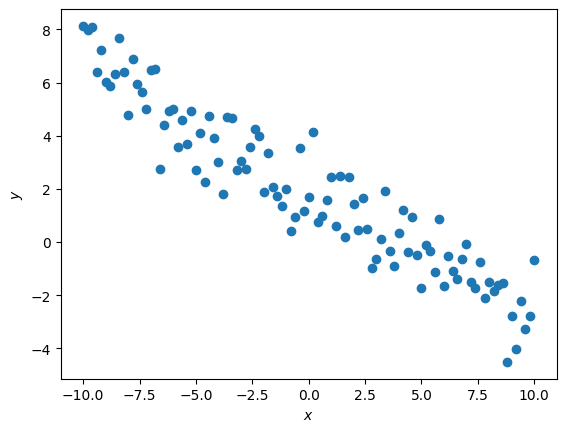

In [69]:
# Printing the data
plt.clf() # Clear previous plots
plt.plot(X, Y, 'o')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

We wish to compute the mean squared error $J(\beta_0, \beta_1)$ and the partial derivatives $\frac{\partial J}{\partial \beta_0}(\beta_0, \beta_1)$ and $\frac{\partial J}{\partial \beta_1}(\beta_0, \beta_1)$, then perform gradient descent.

In [70]:
def squared_error_simple(beta0, beta1, X, Y):
    """
    Returns the mean squared error of beta0, beta1 on training examples (X, Y)."""

    return  np.mean(np.array( [(beta0 + beta1*xi -yi)**2 for xi,yi in zip(X,Y) ]) )


In [71]:
def derivative_squared_error_simple(beta0, beta1, X, Y):
    """
    Returns a pair of floats, containing the partial derivatives of the error relatively to beta0 and beta1.
    """
    return np.array( [np.mean(np.array( [2*(beta0 + beta1*xi -yi)   for  xi,yi in zip(X,Y)] )) ,  np.mean(np.array( [2*xi*(beta0 + beta1*xi -yi) for xi,yi in zip(X,Y)] )) ] )


In [72]:
print(f"Error: {squared_error_simple(0, 0, X, Y)}")
print(f"Gradient: {derivative_squared_error_simple(0, 0, X, Y)}")

Error: 12.747097822233458
Gradient: [-3.91064812 32.83144299]


In [73]:
def one_step_simple_linear_regression_gradient_descent(beta0, beta1, X, Y, learning_rate):
    """
    One step of the gradient descent for the simple linear regression. Takes the parameters, the training examples and the learning rate, and returns the new values for the parameters.

    Returns:
        (_tuple_) : β₀ᵗ⁺¹ , β₁ᵗ⁺¹  for the t+1 th step after step t
    """
    return np.array ( [ beta0 , beta1 ])  - learning_rate*derivative_squared_error_simple(beta0, beta1, X, Y)


In [74]:
def simple_linear_regression_gradient_descent(X, Y, nb_steps, learning_rate = .01):
    """Simple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (beta0, beta1, beta0_hist, beta1_hist) where beta0_hist, beta1_hist are the lists of all values taken by beta0 and beta1.
    Halting condition: when the number of steps is reached."""
    beta  = np.array([rd.random(), rd.random() ]) # Random initialization
    beta0_hist , beta1_hist = [ beta[0] ] , [ beta[1] ]

    while nb_steps > 0:
        beta = one_step_simple_linear_regression_gradient_descent(beta[0], beta[1], X, Y, learning_rate)
        beta0_hist.append( beta[0] )
        beta1_hist.append( beta[1] )
        nb_steps -= 1
    return  beta[0], beta[1], beta0_hist, beta1_hist


We display a plot of the error. As it takes two parameters, this is a 3D plot.

beta0: 1.9553240570505588,
beta1: -0.48281533813345207,
b0_size: 1001,
b1_size: 1001,


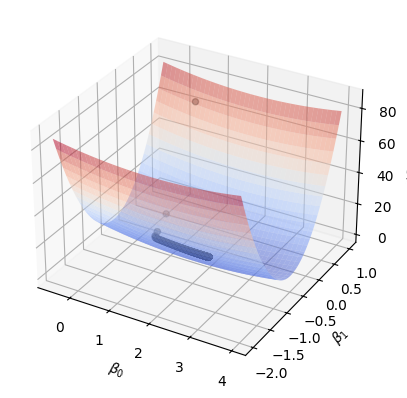

In [75]:
ax = plt.figure().add_subplot(projection='3d')
t0 = np.linspace(-0.5, 4, 81) # Values of beta_0 from -0.5 to 4
t1 = np.linspace(-2, 1, 81) # Values of beta_1 from -2 to 1
T0, T1 = np.meshgrid(t0, t1) # Grid of values of beta_0 and beta_1

squared_error_vect = np.vectorize(squared_error_simple, excluded={2,3})
E = squared_error_vect(T0, T1, X, Y) # Error plot

# Display the error function
ax.plot_surface(T0, T1, E, cmap=plt.cm.coolwarm, alpha=.5)
ax.set_xlabel('$\\beta_0$')
ax.set_ylabel('$\\beta_1$')
ax.set_zlabel('$J(\\beta_0, \\beta_1)$')

# Display the values of beta0 and beta1 during the gradient descent
beta0, beta1, beta0_hist, beta1_hist = simple_linear_regression_gradient_descent(X, Y, 1000, learning_rate = .01)
print(f"beta0: {beta0},\nbeta1: {beta1},\nb0_size: {len(beta0_hist)},\nb1_size: {len(beta1_hist)},")
ax.scatter3D(beta0_hist, beta1_hist, squared_error_vect(beta0_hist, beta1_hist, X, Y), color="black")
plt.show()

Repeat the experiences above with different values for the learning rate $\alpha$. What seem to be good values for $\alpha$ in this case?


*Answer:*

### Parenthesis: `np.vectorize`

The `vectorize` function allows transforming a function $f$ of type `S -> T` into a function `array[S] -> array[T]` that applies $f$ to each element of the array. The `excluded` argument is useful when the function has multiple parameters and you want to avoid vectorizing the function according to one parameter.

A small example of usage of `np.vectorize`:

In [76]:
def f(x, y):
    return x + 2*y

L = np.array(range(5))
f1 = np.vectorize(f, excluded={1})
print(f1(L, 1))

f2 = np.vectorize(f, excluded={0})
print(f1(1, L))

f3 = np.vectorize(f)
print(f3(L, L))

[2 3 4 5 6]
[1 3 5 7 9]
[ 0  3  6  9 12]


### Back to linear regression

Using `matplotlib.pyplot()`, display the data $(X, Y)$ along with the hypothesis $h_\beta\colon x \mapsto \beta_0 + \beta_1 x$ found by gradient descent.

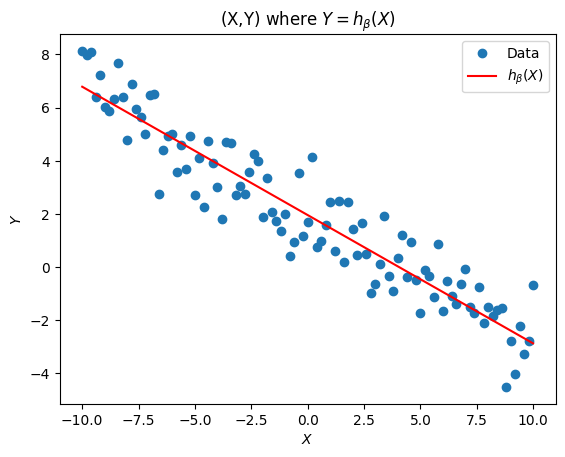

In [77]:
hb = np.vectorize(lambda x: beta0 + beta1*x )

#tracer de x et y
plt.clf()
plt.plot(X, Y , 'o',label="Data") # nuages de points du data set
plt.plot(X,hb(X),color="red",label="$h_\\beta(X)$") # droite de regression
plt.legend()
plt.xlabel("$ X $")
plt.ylabel("$ Y  $")
plt.title("(X,Y) where $ Y = h_\\beta (X)$")
plt.show()
pass

Display on the same plot:
- how the error evolves over time, and
- how the absolute values of the partial derivatives evolve over time.

Use a logarithmic scale `plt.yscale('log')` for the vertical axis.

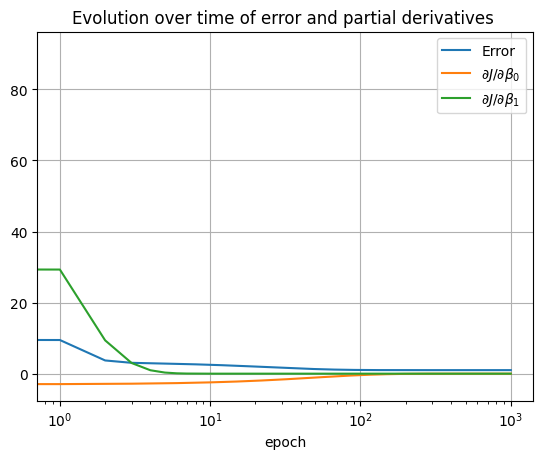

In [78]:

derivative_squared_error_vect = np.vectorize( derivative_squared_error_simple, excluded={2,3} )

epochs = np.arange(len(beta0_hist))

E = squared_error_vect(beta0_hist,beta1_hist,X,Y) # error plot

"""
Dj = [derivative_squared_error_simple(b0,b1,X,Y) for b0,b1 in zip(beta0_hist , beta1_hist)]
Dj0 = [e[0] for e in Dj]
Dj1 = [e[1] for e in Dj]
"""
Dj = np.vstack([derivative_squared_error_simple(b0, b1, X, Y) for b0, b1 in zip(beta0_hist, beta1_hist)])
Dj0 = Dj[:, 0]  # Première colonne pour ∂J/∂β0
Dj1 = Dj[:, 1]  # Deuxième colonne pour ∂J/∂β1

plt.clf()
plt.plot(epochs , E , label = "Error")
plt.plot(epochs,Dj0 ,label= "$ ∂J/∂\\beta_0 $")
plt.plot(epochs,Dj1 ,label= "$ ∂J/∂\\beta_1 $")
plt.title("Evolution over time of error and partial derivatives ")
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.xscale('log')
#plt.yscale('log')
plt.show()


Implement an alternative version of `simple_linear_regression_gradient_descent` which, instead of stopping after a fixed number of steps, stops when the partial derivatives $\frac{\partial J}{\partial \beta_0}$ et $\frac{\partial J}{\partial \beta_1}$ are smaller than $\lambda*J(\beta_0, \beta_1)$, where $\lambda$ is a parameter of the function.

In [79]:
def simple_linear_regression_gradient_descent_alt(X, Y, learning_rate = .01, stop = .01):
    """Simple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (beta0, beta1, beta0_hist, beta1_hist) where beta0_hist, beta1_hist are the lists of all values taken by beta0 and beta1.
    Halting condition: when the derivates are smaller than $stop$ * the error, in absolute value."""
    beta0 , beta1  = rd.random(), rd.random() # Random initialization
    beta0_hist , beta1_hist = [beta0] , [beta1]
    DJ = abs(derivative_squared_error_simple(beta0,beta1,X,Y))
    J = stop*abs(squared_error_simple(beta0,beta1,X,Y))

    while DJ[0]>J or DJ[1]>J:
        beta0 , beta1 = one_step_simple_linear_regression_gradient_descent(beta0, beta1, X, Y, learning_rate)
        beta1_hist.append(beta1)
        beta0_hist.append(beta0)
        nb_steps -= 1
    return beta0, beta1 , beta0_hist, beta1_hist


Check that is gives a similar answer.

In [80]:
epochs = np.arange(len(beta0_hist))

pass

## 1.2. Some reminders on matrices

Functions and operators on matrices, using `numpy`.

In [81]:
A = np.array([[0, 1], [2, 3]])
B = np.array([[2], [-1]])
print(f"A:\n {A}")
print(f"B:\n {B}")

A:
 [[0 1]
 [2 3]]
B:
 [[ 2]
 [-1]]


Careful: we could have defined $A$ and $B$ with `np.matrix` instead of `np.array`. However, using `np.matrix` is [discouraged](https://docs.scipy.org/doc/scipy/tutorial/linalg.html). We will call the objects we manipulate *matrices*, even though they are technically multidimensional arrays (`ndarray`).

In [82]:
print(type(A))

<class 'numpy.ndarray'>


In [83]:
# Matrix dimensions
print(A.shape)
print(B.shape)

(2, 2)
(2, 1)


The product of two matrices $A$ and $B$ can be computed with `A.dot(B)` or `A @ B`.

In [84]:
print(A @ B)

[[-1]
 [ 1]]


Careful: what does `A * B` compute?

*Answer:* the product of each element in matrix ligne per ligne

In [85]:
print(A * B)

[[ 0  2]
 [-2 -3]]


Why is the following code showing an error?

*Answer:* C first shape is not equal to A second shape 

In [86]:
#C = np.array([[7, 0]])
#print(A @ C)

In [87]:
print(f"A:\n {A}")
print(f"A transpose:\n {A.T}")

A:
 [[0 1]
 [2 3]]
A transpose:
 [[0 2]
 [1 3]]


Using [`np.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) from matrices $A = \begin{pmatrix}
0 & 1\\
2 & 3
\end{pmatrix}$, $B = \begin{pmatrix}
2\\
-1
\end{pmatrix}$, and $C = \begin{pmatrix}
7 & 0
\end{pmatrix}$, build the matrices
$\begin{pmatrix}
0 & 1 \\
2 & 3 \\
7 & 0 
\end{pmatrix}$ and $\begin{pmatrix}
0 & 1 & 2\\
2 & 3 & -1
\end{pmatrix}$.

In [88]:
np.concatenate((A, B),axis = 1)
np.concatenate((A,C))


array([[0, 1],
       [2, 3],
       [7, 0]])

The `np.linalg.inv` can be used to compute the inverse $A^{-1}$ of a matrix $A$.

In [89]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[-1.5  0.5]
 [ 1.   0. ]]


Check that $A @ A^{-1}$ and $A^{-1} @ A$ are equal to the identity matrix $\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$.

In [90]:
#matrice identité
identity = np.array([[1,0],[0,1]])
print(A@A_inv == A_inv@A)
print(A_inv@A == identity)
pass

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


Explain the following error.

*Answer:* the matrix is not inversible

In [91]:
#np.linalg.inv(np.array([[1, 1], [2, 2]]))

What are the numpy functions to generate a matrix filled with 0s? Filled with 1s? Generate a matrix $D$ filled with 0s of dimension $5 \times 4$, a matrix $E$ filled with 1s of dimension $5 \times 4$, and verify that $D + E$ and $D \cdot E^{T}$ give the expected result.

In [92]:
D = np.ones((5,4))
E = np.zeros((5,4))
s = D+E
p = D@E.T
print(np.array_equal(D+E , D))
print(np.array_equal(D@E.T , np.zeros((5,5))))
pass

True
True


Line and column operations:

In [93]:
A = np.array([[5*i + j for j in range(5)] for i in range(3)])
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [94]:
print(A[1:,:])

[[ 5  6  7  8  9]
 [10 11 12 13 14]]


In [95]:
print(A[:, 2:4])

[[ 2  3]
 [ 7  8]
 [12 13]]


In [96]:
print(A[1:, :4])

[[ 5  6  7  8]
 [10 11 12 13]]


We want to look at the $3\times 1$ matrix obtained by keeping only the first column of A.
What is the difference between `print(A[:, 0])` and `print(A[:, 0:1])`?

*Answer:*

In [97]:
print(A[:, 0])
print(A[:, 0:1])

[ 0  5 10]
[[ 0]
 [ 5]
 [10]]


## 1.3. Multiple linear regression

We now deal with *multiple linear regression*, that is, the case with multiple predictors ($p > 1$).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

data = np.load("lab3-multiple_linear_regression.npy")
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(811626, 5)


Each row of the `data` matrix contains a training example $((x_1, x_2, x_3, x_4), y)$. There are $p = 4$ predictors and $n = 811626$ data points.

In [99]:
print(data[0])

[-4.          1.          0.          5.4        -7.78488192]


Separate the `data` matrix into a matrix $X$ of dimension $n \times p$ and a matrix $Y$ of dimension $n \times 1$. Add a column of `1`s to the $X$ matrix, so that $X$ now has dimension $n \times (p+1)$. What is the purpose of this last operation?

*Answer:*

In [100]:
# Charger les données du training set
X = data[:,:4] # extraire les 4 première colonnes ,  input du training data set
n = X.shape[0]  # taille du data set (nombre d'échantillons)
p = X.shape[1]  # taille des échantillons (dimensions de l'échantillon)

# Extraire les sorties attendues (sorties du modèle)
Y = data[:,4:]  # colonne 5 à la fin des données, qui sont les sorties attendues pour chaque exemple dans le dataset

print(f"Avant transformation\nX_shape ={X.shape}\nY_shape ={Y.shape}")
X = np.append(X,np.ones((n,1)) , axis=1)# Ajout d'une colonne de 1 pour le biais

print("Après transformation\nX_shape ={X.shape}\nY_shape ={Y.shape}")

Avant transformation
X_shape =(811626, 4)
Y_shape =(811626, 1)
Après transformation
X_shape ={X.shape}
Y_shape ={Y.shape}


In [101]:
print(f"forme de X : {X.shape}")
print(f"forme de Y : {Y.shape}")
print(f"élément de X : {X[0].shape}\nélément de Y :{Y[0].shape} ")

forme de X : (811626, 5)
forme de Y : (811626, 1)
élément de X : (5,)
élément de Y :(1,) 


Adapt the functions for calculating error, their partial derivatives, and the linear regression algorithm. Your functions should only manipulate matrices. Instead of having parameters $(\beta_i)$, we will work with a single "matrix" $\beta$. What is its dimension?

*Answer:*

In [102]:
def squared_error(Beta, X, Y):
	"""Returns the square error of Beta on training examples (X, Y)."""
	return np.mean( np.array( [ ((xi.T).dot( Beta) - yi)**2 for xi,yi in zip(X,Y) ] ) )


In [103]:
Beta = np.zeros((p+1,))
print(f"forme de Beta_test :{Beta.shape} ")
print("β et les xi ont la meme forme  " if Beta.shape==X[0].shape else "β et les xi n'ont pas la meme forme  ")

squared_error(Beta, X, Y)

forme de Beta_test :(5,) 
β et les xi ont la meme forme  


np.float64(337.8381511545455)

In [111]:

def gradient_squared_error(Beta, X, Y):
    """
    Returns the gradient of the square error on training examples (X, Y). The result is a matrix with the same dimension as Beta.
    """
    X = np.array([ np.reshape(e,(-1,1)) for e in X]) # redimensionement des  éléments  de  X en matrice
    Beta = Beta.reshape((X[0].shape)) #reformer β en matrice comme les  échantillons dans  X
    Y = np.array([ np.reshape(e,(-1,1)) for e in Y]) # redimensionement des  éléments  de  Y en matrice
    return (2/(X.shape[0])) * np.array([
            np.dot(xi ,  ( (xi.T)@(Beta) -yi ) )  for xi , yi in zip(X,Y)])





In [105]:
B , x,y   = Beta[:100],X[:100],Y[:100]
temp = gradient_squared_error(B, x,y)
print(f"Avant :\n{x[:3]}")

x =  np.array([ e.reshape(-1,1) for e in x ])
print(f"Après  :\n{x[:3]}")

Avant :
[[-4.   1.   0.   5.4  1. ]
 [-4.   1.   0.   5.8  1. ]
 [-4.   1.   0.   7.6  1. ]]
Après  :
[[[-4. ]
  [ 1. ]
  [ 0. ]
  [ 5.4]
  [ 1. ]]

 [[-4. ]
  [ 1. ]
  [ 0. ]
  [ 5.8]
  [ 1. ]]

 [[-4. ]
  [ 1. ]
  [ 0. ]
  [ 7.6]
  [ 1. ]]]


In [106]:
print(temp.shape)

np.max(abs(temp[:3]),axis = 1)

(100, 5, 1)


array([[0.84076725],
       [0.80336625],
       [1.21324755]])

In [107]:
def one_step_linear_regression_gradient_descent(Beta, X, Y, learning_rate):
    """One step of the gradient descent for the multiple linear regression. Takes the parameters, the training examples and the learning rate, and returns the new values for the parameters."""
    return Beta - learning_rate*gradient_squared_error(Beta,X,Y)

In [108]:
def linear_regression_gradient_descent(X, Y, nb_steps, learning_rate = .01):
    """Multiple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (Beta, Beta_hist) where Beta_hist is the historic of all values taken by Beta.
    Halting condition: when the number of steps is reached."""
    X = np.array([e.reshape(-1,1) for e in X])
    Y = np.array([e.reshape(-1,1) for e in Y])
    beta = np.zeros(X[0].shape)
    beta_hist = [beta]

    while nb_steps>0:
        beta = one_step_linear_regression_gradient_descent(beta,X,Y,learning_rate)
        beta_hist.append(beta)
        nb_steps-=1

    return beta , beta_hist

Execute the algorithm on the data, and display how the error and the maximum of the absolute values of the gradients evolve over time.

In [112]:
beta , beta_hist = linear_regression_gradient_descent(X,Y,1000,learning_rate = .01)

Ev = [squared_error(e,X,Y) for e in beta_hist]

ValueError: cannot reshape array of size 4058130 into shape (5,1)

In [ ]:
pass

In [ ]:
print(E[-1]) # Last error
print(Beta)

## 1.4. Stochastic gradient descent

We want to implement stochastic gradient descent: we will take the version that shuffles the data and uses the $i$-th example (after shuffling) at the $i$-th iteration. Look at the documentation of [`np.random.shuffle`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html), then shuffle the data. ***WARNING:*** you should **never** shuffle $X$ and then shuffle $Y$. Why not?

*Answer:* ils sont liés entre eux et les valeurs attendues $Y$ ne seraient plus celles attendus  à partir de $X$

In [ ]:
# Shuffle
pass

In [ ]:
print(X.shape)
print(Y.shape)

(811626, 5)
(811626, 1)


In [114]:
def squared_error_stoch(Beta, X, Y, i):
	"""Returns the square error of Beta computed on the $i$-th training example (X, Y)."""
	return ((X[i].T).dot(Beta) - Y[i])**2

In [115]:
Beta = np.zeros((p+1, 1))
print(squared_error_stoch(Beta, X, Y, 0))

[60.60438652]


In [116]:
def gradient_square_error_stoch(Beta, X, Y, i):
    """Returns the gradient of the square error on $i$-th training example of (X, Y). The result is a matrix with the same dimension as Beta."""
    X = np.array([ e.reshape(-1,1) for e in X]) # redimensionement des  éléments  de  X en matrice
    Beta = Beta.reshape((X[0].shape)) #reformer β en matrice comme les  échantillons dans  X
    Y = np.array([ e.reshape(-1,1) for e in Y]) # redimensionement des  éléments  de  Y en matrice
    return 2 * X[i] .dot( ((X[i].T)@(Beta) - Y[i]))

In [117]:
print(gradient_square_error_stoch(Beta, X, Y, 0))

[[-62.27905537]
 [ 15.56976384]
 [  0.        ]
 [ 84.07672475]
 [ 15.56976384]]


Implement the functions `one_step_linear_regression_gradient_descent_stoch` and `linear_regression_gradient_descent_stoch`.

In [120]:
def one_step_linear_regression_stoch(Beta, X, Y, i, learning_rate):
    """One step of the stochastic gradient descent for the multiple linear regression. Takes the parameters, the training examples, the current number of steps and the learning rate, and returns the new values for the parameters."""
    return Beta - learning_rate*gradient_square_error_stoch(Beta,X,Y,i)

In [122]:
def linear_regression_gradient_descent_stoch(X, Y, nb_steps, learning_rate = .01):
    """Stochastic gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (Beta, Beta_hist) where Beta_hist is the history of all values taken by Beta.
    Halting condition: when the number of steps is reached."""
    X = np.array([ e.reshape(-1,1) for e in X])
    Y = np.array([ e.reshape(-1,1) for e in Y])
    beta = np.zeros(X[0].shape)
    beta_hist = [beta]

    while nb_steps>0:
        for i in range(X.shape[0]):
            beta = one_step_linear_regression_stoch(beta,X,Y,i,learning_rate)
            beta_hist.append(beta)
        nb_steps-=1

    return beta , beta_hist

Execute the algorithm on the data and display how the error and the maximum of the absolute values of the gradients evolve over time. What do you observe?

In [ ]:
Beta, Beta_hist = linear_regression_gradient_descent_stoch(X, Y, 800000, learning_rate=10**-2)
print(Beta)

In [ ]:
pass

In [ ]:
pass

*Decreasing learning rate:* Instead of multiplying the gradient by the learning rate $\alpha$, multiply it by $\frac{\alpha}{t+1}$ where $t$ is the iteration number. The $+1$ is simply to avoid dividing by 0 at the first step.

In [ ]:
def linear_regression_gradient_descent_stoch_descreasing_rate(X, Y, nb_steps, learning_rate = .01):
    """Multiple batch gradient descent algorithm to compute a linear regression.
    Takes the training examples and the learning rate (0.01 by default) and returns (Beta, Beta_hist) where Beta_hist is the historic of all values taken by Beta.
    Halting condition: when the number of steps is reached."""
    pass

In [ ]:
pass

Plot the error. Is the error now (empirically) converging?

In [ ]:
pass

## 1.5. Closed-form solution

Implement the exact method (closed-form solution) to find $\beta$. What is the error value you find?

In [ ]:
def exact_method(X, Y):
    """Exact method to find the parameters of a linear regression."""
    pass

In [ ]:
Beta_opt = exact_method(X, Y)
print(Beta_opt)

In [ ]:
print(squared_error(Beta_opt, X, Y))
print(gradient_squared_error(Beta_opt, X, Y))

We see that the values for the gradient are negligible (very close to $0$): this shows that we have found a point where the gradient vanishes. 

# 2. Logistic regression

In [ ]:
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## 2.1 Newton's method

Consider the function $$f(x) = x^4 + 3x^3 - 6x^2 + 4x + 12.$$

Using the (one-dimensional) Newton's method, compute
* its roots,
* its global minimum.

Use the same method <code>newton_1d</code> (with different arguments) for both tasks.
Use the graph of $f$ to guide you.

In [ ]:
def f(x):
    return x**4 + 3 * x**3 - 6 * x**2 + 4 * x + 12

def df(x):
    """Computes the derivative of f at point x."""
    pass

def ddf(x):
    """Computes the second derivative of f at point x."""
    pass

In [ ]:
# Graph of f from -5 to 5
plt.figure()
values = np.linspace(-5, 5, 10000)
plt.plot(values, [f(x) for x in values], "-")
plt.grid()
plt.show()

In [ ]:
def newton_1d(f, df, x0, max_iter=1000, epsilon=1e-10):
    """Finds a root of f given its derivative df and an initial guess x0.
       Assumes that a value x is a root if abs(f(x)) < epsilon.
       Raises an exception if no such value is found within max_iter iterations."""
    pass

In [ ]:
# Find the two roots and the global minimum using newton_1d.

pass

In this section, we want to predict [the quality of apples](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data) using logistic regression based on two predictors: their size and their sweetness. Both features are real numbers (already normalized) and the quality is an integer in $\{0, 1\}$: $1$ for good apples and $0$ for bad apples.
The dataset `lab3_apples.npy` is available in the file `lab3.zip` on Moodle and contains $1000$ training data points.

In [ ]:
# 1000 data points, three predictors : size, sweetness, and quality
apple_quality = np.load("lab3-apples.npy")
print(np.shape(apple_quality))
print(apple_quality)

size = apple_quality[:,0]
sweetness = apple_quality[:,1]
quality = apple_quality[:,2]

Make a 2D graph (one dimension per predictor) to display all the data points; use different symbols to distinguish good and bad apples.

In [ ]:
pass

We have seen in class that the log-likelihood for logistic regression is as follows:
$$\ell(\beta) = \sum_{i = 1}^m y^{(i)}\log h_\beta(x^{(i)}) + (1 - y^{(i)})\log(1 - h_\beta(x^{(i)})),$$
où $h_\beta(x^{(i)}) = \frac{1}{1 + e^{-\beta^{T}x^{(i)}}}$.

We have also seen that the partial derivatives are
$$\frac{\partial}{\partial\beta_j}\ell(\beta) = \sum_{i=1}^m (y^{(i)} - h_\beta(x^{(i)}))x_j^{(i)}.$$

You can thus compute the entries of the Hessian matrix: for $0 \le j, k \le p$, the element at position $(j, k)$ is given by

*Answer:*

*Remark*: We have declared in class (without a proof) that $\ell$ is concave, and thus has a single local maximum, which is also global. This can be shown by analyzing the properties of the Hessian matrix: the Hessian matrix is *negative semi-definite* for all $\beta$, that is, for all $z\in\mathbb{R}^{p+1}$, $z^TH(\beta)z \le 0$. This can be checked as an exercise. This property is the multi-dimensional generalization of the property "for $f\colon \mathbb{R} \to \mathbb{R}$ twice differentiable, $f$ is concave if $f'' < 0$".

Implement functions that implement $h_\beta$, the gradient of $\ell$, and the Hessian matrix of $\ell$. Note that the Hessian matrix does not depend on $Y$!

In [ ]:
def h(xi, beta):
    pass

def gradient_l(X, Y, beta):
    pass

def hessian_l(X, beta):
    pass

Use the Hessian matrix and the (multi-dimensional) Newton's method to find the values $\beta = (\beta_0, \beta_1, \beta_2)$ that maximize the likelihood.

In [ ]:
def newton_multidim(f, df, beta_0, max_iter=1000, epsilon=1e-6):
    """Finds a root of multivariate function f given its gradient df and an initial guess beta_0.
       Assumes that a value beta is a root if np.linalg.norm(f(beta)) < epsilon.
       Raises an exception if no such value is found within max_iter iterations."""
    pass

Add to your previous graph the *decision boundary* (which is the line such that $\beta^Tx = 0$ for the vector $\beta$ to be found, which corresponds to the line of points $x$ giving the value $\frac{1}{2}$ to the sigmoid function) given by the logistic regression.

In [ ]:
pass